<center> <img src="https://www.goodreturns.in/img/2016/01/insuranceauto-25-1453703850.jpg" /> </center>


# Introduction

# Problem Statements

VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.

# Data Description

You are provided with the sample dataset of the company holding the information of customers and policy such as highest qualification of the user, total income earned by a customer in a year, employee status,  policy opted by the user, type of policy and so on and the target variable indicating the total customer lifetime value.

## Data Dictionary

You are provided with 3 files - train.csv, test.csv and sample_submission.csv


### Training Data 

You are provided with around 90K records containing the attributes of the user and policy and the target variable cltv indicating the total customer lifetime value.

|Variable       |Description                                                |
| ------------- |:-------------                                            :| 
|id             |Unique identifier of a customer                            |
|gender         |Gender of the customer                                     |
|area           |Area of the customer                                       |
|qualification  |Highest Qualification of the customer                      |
|income         |Income earned in a year (in rupees)                        |
|marital_status |Marital Status of the customer {0:Single, 1: Married}      |
|vintage        |No. of years since the first policy date                   |
|claim_amount   |Total Amount Claimed by the customer (in rupees)           |
|num_policies   |Total no. of policies issued by the customer               |
|policy         |Active policy of the customer                              |
|type_of_policy |Type of active policy                                      |
|cltv           |Customer life time value (Target Variable)                 |



# Importing Libraries

In [1]:
# For Numerical Python
import numpy as np

# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.precision', 4)

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For Data Model Development
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# For Machine Learning Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importing Data 

In [4]:
data = pd.read_csv("train_BRCpofr.csv")

In [5]:
data.head(10)


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
5,6,Male,Rural,High School,More than 10L,1,1,0,1,C,Gold,348768
6,7,Female,Rural,Bachelor,5L-10L,1,6,0,More than 1,A,Gold,238920
7,8,Female,Urban,High School,5L-10L,0,0,5473,More than 1,A,Silver,64128
8,9,Female,Urban,High School,5L-10L,1,3,6105,More than 1,A,Gold,94536
9,10,Male,Rural,High School,More than 10L,1,6,0,More than 1,A,Platinum,99060


In [6]:
data.shape

(89392, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [8]:
data.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000,89392.0000,89392.0000,89392.0000,89392.0000
mean,44696.500,0.5755,4.5957,4351.5024,97952.8290
std,25805.392,0.4943,2.2904,3262.3598,90613.8148
min,1.000,0.0000,0.0000,0.0000,24828.0000
25%,22348.750,0.0000,3.0000,2406.0000,52836.0000
50%,44696.500,1.0000,5.0000,4089.0000,66396.0000
75%,67044.250,1.0000,6.0000,6094.0000,103440.0000
max,89392.000,1.0000,8.0000,31894.0000,724068.0000


- No missing data and duplicate entries

### Observations

#### - 89392 observations in data and no missing entries
 

In [9]:
data['income'].value_counts()


5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

In [10]:
data['qualification'].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [11]:
data['area'].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [12]:
data['vintage'].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

In [13]:
data['num_policies'].value_counts()

More than 1    60263
1              29129
Name: num_policies, dtype: int64

In [14]:
data['policy'].value_counts()

A    56644
B    24635
C     8113
Name: policy, dtype: int64

In [15]:
data['type_of_policy'].value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

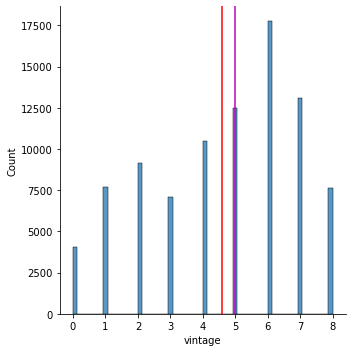

In [16]:
sns.displot(data.vintage)
plt.axvline(data.vintage.mean(), color='r')
plt.axvline(data.vintage.median(), color='m')
plt.show()

In [17]:
#from pandas_profiling import ProfileReport 
#profile = ProfileReport(df=data)
#profile.to_file(output_file='Pre Profiling Report.html')
#print('Accomplished!')

### Observations
 
- Total 89392 observations and 12 columns in data. **No Missing** values in data.
- Of 12 columns **8 catagorical and 4 numerical columns**.
- 56-44 Male-Female ratio customer.
- **Majority(70%)** of customers are from **Urban** `area`.
- **59%** customers are in **5L-10L Income** slab, then **23% in 2L-5L** slab.
- **57%** customers are married.
- **20%** customers have **claimed  nothing**.
- **Claimed amount** column have **positive skewness** of 1. 95th percentile is 10078 and max value is 31894 suggesting **there are some outliers**.
- **67.4%** customers have **more than 1 policy**.
- **63.4%** customers have **A poicy** followed by **27.6** have **B policy**.
- **Platnum policy type** have **maximum(53.5%)** distribution in data set. Other two types have equal distribution.
- `CLTV` has **mean 97952** and **median 66396**
    - kewness is **2.75** suggesting data is little bit skewed.
    - he 95th percentile is 307265 and maximum value is 724068.
- There is some **correlation** between
    - Area and claim amount**.
    - CLTV and No. of policies**.
 

<AxesSubplot:>

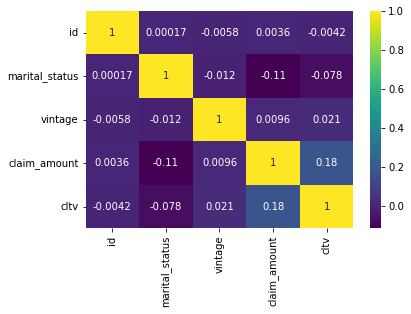

In [18]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

##  relation between cltv and claim amount?

## vintage , cltv and policy


- **20%** customers had their **first policy 6 years ago.** 

## Feature Extraction


- Claim amount column have outlier and column is skewed. Many entries are 0(claimed nothing). 
- onvert claim amount column to catagorical column of 4 bins.

In [19]:
data[data['claim_amount']==0]['cltv'].mean()

75791.43296927169

In [20]:
data['vintage'].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

In [21]:
data.groupby(by='vintage').mean()['cltv']

vintage
0     86972.7016
1     92467.9312
2     99822.9840
3    104415.6584
4     98144.8885
5     96148.5775
6     97614.3373
7     98412.7239
8    103711.8227
Name: cltv, dtype: float64

In [22]:
data.shape


(89392, 12)

In [23]:
def per_year(num,den):    
    p=[]
    for i in range(len(num)):
        if den[i] != 0:
            a = num[i] / den[i]
            p.append(a)
        else:
            p.append(0)
    return p


Creating new feature for claim amount per year.

In [24]:
data['claim_per_year'] = per_year(data.claim_amount,data.vintage)

In [25]:
data['claim_per_year'].max()

23697.0

In [30]:
bins =[-1,6000,12000,18000,24000]

data["claim_cat"] = pd.cut(data.claim_per_year, bins=bins, labels=['1','2','3','4'])


In [31]:
data.claim_cat.value_counts()

1    87154
2     2073
3      152
4       13
Name: claim_cat, dtype: int64

In [32]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_per_year,claim_cat
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308,1158.0000,1
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400,635.0000,1
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212,324.8750,1
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920,0.0000,1
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736,584.6667,1


In [37]:
data.groupby(['claim_cat','num_policies']).mean()['cltv']

claim_cat  num_policies
1          1                50868.6366
           More than 1     120053.6658
2          1                55777.4083
           More than 1     141882.4986
3          1                58710.0000
           More than 1     150405.7059
4          1                74954.4000
           More than 1     153105.0000
Name: cltv, dtype: float64

In [34]:
data[data['claim_cat']=='4']

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_per_year,claim_cat
2461,2462,Female,Urban,High School,5L-10L,0,1,19663,More than 1,A,Gold,173976,19663.0,4
5522,5523,Female,Urban,High School,5L-10L,1,1,22372,1,A,Platinum,142512,22372.0,4
10247,10248,Female,Urban,High School,2L-5L,0,1,18295,More than 1,A,Silver,95616,18295.0,4
10934,10935,Female,Rural,High School,More than 10L,0,1,18198,1,A,Silver,59724,18198.0,4
13429,13430,Male,Rural,High School,5L-10L,0,1,18620,1,C,Platinum,59556,18620.0,4
14528,14529,Male,Urban,High School,5L-10L,0,1,18475,More than 1,A,Platinum,62412,18475.0,4
28339,28340,Male,Urban,Bachelor,2L-5L,0,1,23024,More than 1,B,Platinum,100560,23024.0,4
30496,30497,Male,Urban,Bachelor,More than 10L,0,1,18509,More than 1,A,Platinum,264432,18509.0,4
51388,51389,Male,Urban,High School,5L-10L,1,1,20094,1,C,Silver,50364,20094.0,4
64849,64850,Male,Urban,Bachelor,2L-5L,0,1,21219,1,A,Silver,62616,21219.0,4


<a id = Section7></a>
## **7. Post Data Processing & Analysis**

<a id = Section701></a>
### **7.1 Encoding Categorical Data**

In [ ]:
# Creating dummy variable of the Type column
data = pd.get_dummies(data, drop_first=True)
data.head()

<a id = Section704></a>
### **7.3 Data Splitting**

- Now, we will **split** the dataset into **Train** and **Test** subsets.

- We will use **80%** data for **training** and the remaining **20%** data for **testing** our models.

In [ ]:
# Creating the feature matrix by removing the target variable
X = data.drop(['cltv','id'], axis=1)
X.head()


In [ ]:
# Creating the target vector
y = data['cltv']
y.head()

In [ ]:
s = MinMaxScaler()
sc = s.fit_transform(X[['claim_amount','claim_per_year']])
sc = pd.DataFrame(sc ,columns=['claim_amount','claim_per_year'])

In [ ]:
X =X.drop(labels=['claim_amount','claim_per_year'], axis=1)
X = pd.concat(objs=[X,sc], axis=1 ) 

In [ ]:
X.head()

In [ ]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Checking the shapes of the training and test sets.
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

<a id = Section8></a>
## **8. Model Development & Evaluation**

- In this section, we will be **building** our Machine Learning models and fitting them with the training data.

- We will be building models using:

  - **All** the **features** of the training set.

  - The most **important features** of the training set, according to the Random Forest algorithm.

- We will use **K-fold Cross Validation** to validate our models and select the best one.

- We are creating a **helper function** `display_scores` that will help us in **displaying** our *K-fold cross validation* **scores**.

In [ ]:
# A helper function to display the scores along with the mean and standard deviation of scores.
def display_scores(scores):
    scores_rmse = np.sqrt(-scores)
    print('Scores:', scores_rmse)
    print('Mean:', scores_rmse.mean())
    print('Standard Deviation:', scores_rmse.std())

<a id = Section801></a>
### **8.1 Baseline Models**

- In the baseline models, we will be using **all** the **features** of the dataset in our models.

- We will be performing **5-fold** cross-validation to **validate** our models.

<a id = Section80101></a>
#### **8.1.1 Linear Regression Model**

In [ ]:
base_lr = LinearRegression()

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_lr, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

In [ ]:
base_lr.fit(X_train,y_train)
train_pred = base_lr.predict(X_train)
test_pred = base_lr.predict(X_test)

pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': test_pred[0:5]})


In [ ]:
X_test.head()

In [ ]:
data.iloc[8413]

<a id = Section80102></a>
#### **8.1.2 Decision Tree Model**

In [ ]:
base_dt = DecisionTreeRegressor(random_state=0)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_dt, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

In [ ]:
base_dt.fit(X_train,y_train)
train_pred = base_dt.predict(X_train)
test_pred = base_dt.predict(X_test)
pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': test_pred[0:5]})


<a id = Section80103></a>
#### **8.1.3 Random Forest Model**

In [ ]:
# Creating a Random Forest model.
base_rf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_rf, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

In [ ]:
base_rf.fit(X_train,y_train)
train_pred = base_rf.predict(X_train)
test_pred = base_rf.predict(X_test)

pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': test_pred[0:5]})


#### **Checking Feature Importances**

In [ ]:
# Fitting the baseline Random Forest model on the entire train set to obtain the feature importances of each feature. 
base_rf.fit(X_train, y_train)

In [ ]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(base_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

In [ ]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, base_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
base_ad = AdaBoostRegressor(base_estimator=base_lr, learning_rate=0.1, random_state=0)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_ad, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

In [ ]:
base_gb = GradientBoostingRegressor(max_depth=6, random_state=0)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=base_gb, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

In [ ]:
from xgboost import XGBRegressor

<a id = Section802></a>
### **8.2 Essential Feature Models**

- In the essential feature models, we will be using only the **most important features** of the dataset in our models.

- The features are selected on the basis of the **feature importance** obtained from the Random Forest model.

- We will be performing **5-fold** cross-validation to **validate** our models.

In [ ]:
X_train_essential = X_train[['claim_amount', 'num_policies_More than 1', 'vintage', 'qualification_High School','qualification_High School', 'type_of_policy_Platinum', 'gender_Male', 'income_5L-10L','type_of_policy_Silver', 'income_More than 10L','claim_per_year' ]]
X_train_essential.head()

<a id = Section80201></a>
#### **8.2.1 Linear Regression Model**

In [ ]:
essential_lr = LinearRegression()

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_lr, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

<a id = Section80202></a>
#### **8.2.2 Decision Tree Model**

In [ ]:
essential_dt = DecisionTreeRegressor(random_state=0)

In [ ]:
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_dt, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

<a id = Section80203></a>
#### **8.2.3 Random Forest Model**

In [ ]:
# Creating a Random Forest model.
essential_rf = RandomForestRegressor(n_estimators=10, random_state=0, n_jobs=-1)

In [ ]:
%%time
# Performing K-fold Cross-validation for 5 folds.
scores = cross_val_score(estimator=essential_rf, X=X_train_essential, y=y_train, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Displaying the RMSE scores with display_score helper function.
display_scores(scores)

**Observations:**

- The mean **RMSE** score for the Essential Feature Random Forest Model is 

- Our model has improved even though we are using only a **subset** (i. e. 6 features) of the features from the entire dataset.

- It took **53 seconds** to perform 5-fold cross-validation on our Random Forest model having 10 trees.

- The **training time** has **reduced** significantly and the **performance** has **improved**.

- The RMSE is still significantly **lower** than the Decision Tree model.

#### **Model Comparision**

**Baseline Models**

| Model | RMSE Score |
| :--: | :--: |
| **Linear Regression** | **21612.39** |
| **Decision Tree** | **5322.68** |
| **Random Forest** | **3997.32** |

<br>

**Essential Feature Models**

| Model | RMSE Score |
| :--: | :--: |
| **Linear Regression** | **21669.89** |
| **Decision Tree** | **4644.98** |
| **Random Forest** | **3686.24** |

<a id = Section803></a>
### **8.3 Hyperparameter Tuning of Model**

In [ ]:
param_grid = [{'n_estimators': [60,70,80,90], 'max_depth': [5,7,9], 'max_features': ['auto', 2, 4,6,8]}]

In [ ]:
temp_rf = RandomForestRegressor(random_state=0, n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [ ]:
%%time
grid_search.fit(X_train_essential, y_train)

In [ ]:
# Calculating the best RMSE score found by Grid Search 
np.sqrt(-grid_search.best_score_)

In [ ]:
# The hyperparameter values which provide us the best RMSE score
grid_search.best_params_

<a id = Section804></a>
### **8.4 Final Model**

- We found out the **best hyperparameter combinations** for our Random Forest model.

- Now, we will use the model with those hyperparameters as our **final model**.

- Using this final model, we will make **predictions** on our test set.

**Creating the Final Model**

In [ ]:
# Creating the final random forest model from the grid search's best estimator.
final_rf = grid_search.best_estimator_

**Fitting the Final Model**

In [ ]:
# Fitting the final model with training set
final_rf.fit(X_train_essential, y_train)

- After fitting the final model with the training data, we are ready to make **predictions** on the test set. 

**Removing Non-Essential Features from the Test Set**

- We trained our model on only the most important features of the dataset.

- So, we need to **remove** the **non-important features** from our test set as well.

- If we don't remove the non-essential features our model will give an **error** while making predictions due to the **difference in shapes** of training and testing sets.

In [ ]:
# Creating the test set with only the essential features
X_test_essential = X_test[['claim_amount', 'num_policies_More than 1', 'vintage', 'qualification_High School','qualification_High School', 'type_of_policy_Platinum', 'gender_Male', 'income_5L-10L','type_of_policy_Silver', 'income_More than 10L','claim_per_year' ]]
X_test_essential.head()

**Making Predictions**

- Now, we will make **predictions** on both our training and testing sets.

In [ ]:
# Making predictions on the train set
y_train_pred = final_rf.predict(X_train_essential)

In [ ]:
# Making predictions on the test set
y_test_pred = final_rf.predict(X_test_essential)

In [ ]:
pd.DataFrame({'Actual Test Set Values': y_test[0:5].values, 'Predicted Test Set Values': y_test_pred[0:5]})

**Calculating the RMSE Score**

In [ ]:
# Estimating RMSE on Train & Test Data
print('RMSE for Train Set:', np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)), decimals=2))
print('RMSE for Test Set:', np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)), decimals=2))

**Calculating R-Squared Value**

In [ ]:
# Estimating R-Squared on Train & Test Data
print('R-Squared for Train Set:', np.round(r2_score(y_train, y_train_pred), decimals=2))
print('R-Squared for Test Set:', np.round(r2_score(y_test, y_test_pred), decimals=2))

In [ ]:
# Creating a helper function to plot the actual and predicted values for train and test sets.
def plot_score(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot acutal and predicted values for train & test data
  y_train: actual y_train values
  y_train_pred: predicted values of y_train
  y_test: actual y_test values
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize=[16, 6])
  plt.subplot(1, 2, 1)
  sns.regplot(x=y_train, y=y_train_pred, color='red')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Train Data', size=16)

  plt.subplot(1, 2, 2)
  sns.regplot(x=y_test, y=y_test_pred, color='green')
  plt.xlabel('Actual', size=14)
  plt.ylabel('Predicted', size=14)
  plt.title('For Test Data', size=16)
  plt.show()

In [ ]:
# Plotting Actual vs Predicted Values
# This will take some time
plot_score(y_train, y_train_pred, y_test, y_test_pred)

<a id = Section9></a>
## **9. Conclusion**

In [ ]:
y_test = pd.read_csv("test_koRSKBP.csv")
y_test['claim_per_year'] = creat(y_test)
y_test = pd.get_dummies(y_test, drop_first=True)
y_test = y_test.drop(['id'], axis=1)
sc = s.transform(y_test[['claim_amount','claim_per_year']])
sc = pd.DataFrame(sc ,columns=['claim_amount','claim_per_year'])
X =X.drop(labels=['claim_amount','claim_per_year'], axis=1)
X = pd.concat(objs=[X,sc], axis=1 ) 

In [ ]:
y_test_pred = final_rf.predict(y_test[['claim_amount', 'num_policies_More than 1', 'vintage', 'qualification_High School','qualification_High School', 
                                       'type_of_policy_Platinum', 'gender_Male', 'income_5L-10L','type_of_policy_Silver',
                                       'income_More than 10L','claim_per_year'] ])

In [ ]:
print(y_test_pred)